# Convolutions in PyTorch

[link](https://ut.philkr.net/deeplearning/convolution/convolutions_in_pytorch/)

In [60]:
import torch

## Convilution layer

In [61]:
input_dim = 28,28
input_channels = 1
output_channels = 16
kernel_size = 3
stride = 1
padding = (kernel_size - 1) // 2
net = torch.nn.Conv2d(input_channels, output_channels, kernel_size, stride, padding)

In [62]:
# batch, n_chanesls, height, width
x = torch.randn(1, 1, 28, 28)
print(x.shape)

torch.Size([1, 1, 28, 28])


In [63]:
y = net(x)
print(y.shape)

torch.Size([1, 16, 28, 28])


## Convolution network

In [68]:
class ConvNet(torch.nn.Module):
    def __init__(self,layers=[16,32,64], kernel_size=3, stride=1):
        super().__init__()
        conv_layers = []
        c1 = 1
        for c2 in layers:
            conv_layers.append(torch.nn.Conv2d(c1, c2, kernel_size, stride, (kernel_size - 1) // 2))
            conv_layers.append(torch.nn.ReLU())
            c1 = c2
        conv_layers.append(torch.nn.Conv2d(c1, 1, kernel_size=1))
        #conv_layers.append(torch.nn.AdaptiveAvgPool2d(1)) #avg pooling
        self.network = torch.nn.Sequential(*conv_layers)

    def forward(self, x):
        return self.network(x)

In [89]:
net = ConvNet(stride=1)
print(net)

ConvNet(
  (network): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 1, kernel_size=(1, 1), stride=(1, 1))
  )
)


In [90]:
y=net(x)
y.shape

torch.Size([1, 1, 28, 28])

## Receptive field

In [116]:
from matplotlib import pyplot as plt
net = ConvNet(stride=1)
x = torch.randn(1, 1, 28, 28, requires_grad=True)
y = net(x)
z = y.new_zeros(y.shape) # creates a tensor of zeros with the same shape and type and device as y
z[0,0,z.shape[2]//2,z.shape[3]//2] = float('NaN')
(z*y).sum().backward()

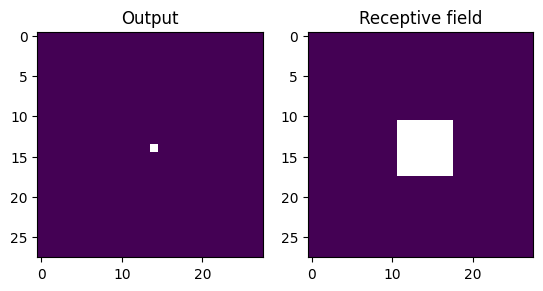

In [117]:
f,ax = plt.subplots(1,2)

ax[0].set_title('Output')
ax[0].imshow(z[0,0].detach().numpy())
ax[1].set_title('Receptive field')
ax[1].imshow(x.grad[0,0].detach().numpy())